In [93]:
import numpy as np
from PIL import Image
from ultralytics import YOLO

In [118]:
onnx_path = './yolo11s_30_ep_best.onnx'
img_path = './14052021_(9)@ds-1320-inv.jpg'

In [139]:
model = YOLO(onnx_path, task='detect')

In [140]:
%%time
results = model.predict(img_path, imgsz=512)

Loading yolo11s_30_ep_best.onnx for ONNX Runtime inference...

image 1/1 /home/d.maslov/14052021_(9)@ds-1320-inv.jpg: 512x512 1 class_0, 39.9ms
Speed: 0.9ms preprocess, 39.9ms inference, 9.1ms postprocess per image at shape (1, 3, 512, 512)
CPU times: user 1.36 s, sys: 50.2 ms, total: 1.41 s
Wall time: 157 ms


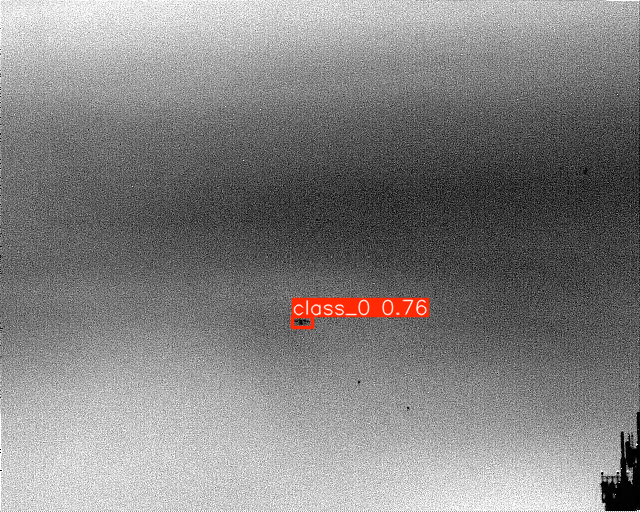

In [141]:
Image.fromarray(results[0].plot())